### Student Information
Name: 毛柏毅

Student ID: 111062209

GitHub ID: Dogeon188

---

### Instructions

### First Phase Submission

1. [X] First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__

2. [X] Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    
    - Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.

3. [X] Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - [X] Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.  

4. [X] Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

In [1]:
# test code for environment setup
import umap
import PAMI
import math
from matplotlib import pyplot as plt
import plotly as py
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np
import nltk

nltk.download('punkt')  # download the NLTK datasets
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/dogeon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/dogeon/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

# Phase 1

In [3]:
### Begin Assignment Here

## 1. The Data

Let's first read the new dataset.

In [4]:
X = pd.read_csv('./newdataset/Reddit-stock-sentiment.csv')

Now let's take a look at some basic information of the dataset.

In [5]:
print(X.shape)
X.head()

(847, 16)


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


##### >>> **Exercise 1**

In this exercise, please print out the *text* data for the first three samples in the dataset.

In [6]:
for i in range(3):
    print(X.iloc[i].text)

Calls on retards
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Seeing lots of red in the ticker.


## 2. Data Preparation & Exploration

Let's first inspect some columns.

In [7]:
X.type.value_counts()

type
comment    783
post        64
Name: count, dtype: int64

In [8]:
X.subreddit.value_counts()

subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64

In [9]:
X.datetime.min(), X.datetime.max()

('2021-01-28 17:58:52', '2025-04-12 3:23:21')

##### >>> **Exercise 2**

Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

Here's the author list. Notice a few things:

- User `saasfin` has a significant number of posts and comments. They can either be a very active user or a bot.
- There are some posts/comments with unknown authors (`[deleted]`). However, they are still real posts/comments, and may contain useful information.
- Some posts/comments are made by `AutoModerator`, which is a bot that automatically moderates the subreddit. Their content is usually not relevant to our analysis.

In [10]:
print("Null", X.author.isnull().sum(), "Unique", len(X.author.unique()))
X.author.value_counts()

Null 0 Unique 731


author
saasfin              57
AutoModerator        15
[deleted]            13
bullrfuk              5
wutang                3
                     ..
Hot_Frosting_7101     1
Alexwonder999         1
Ineedgold             1
RoninKnight17         1
I_am_Nerman           1
Name: count, Length: 731, dtype: int64

In [11]:
X[X.author == 'saasfin'].head(5)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
48,post,2025-04-02 13:00:42,1jpnz8b,stockstobuytoday,Earnings for current week,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,\n\n [MarketWatch: Stock Market News - Financ...,0.00,0.00,0.0,"['Stock', 'MarketWatch', 'catalyst', 'stockbuy...",0.0
59,comment,2021-04-14 16:24:10,gui4bru,stockstobuytoday,r/stockstobuytoday Lounge,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,heard chatter upto $350,0.00,0.00,0.0,"['heard', 'chatter']",0.0
60,comment,2021-11-06 13:37:29,hjjrv6d,stockstobuytoday,Technical Analysis Thread.,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,$IRDM\n\n&#x200B;\n\n[/](/)\n\nat high level i...,0.47,0.08,1.0,"['consolidating', '/', 'x200B', 'level', 'IRDM...",0.0
70,post,2025-03-29 18:14:28,1jmshlc,stockstobuytoday,FINRA Daily Shorts Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,Updated Daily by EOD\n\n \n[Daily Shorts](),0.10,0.00,0.0,"['EOD', 'Daily', 'Shorts', ']', '[']",0.0
88,comment,2022-04-23 20:10:13,i5x0g2b,stockstobuytoday,Technical Analysis Thread.,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,$FDX - still in downtrend\n\n[/](/)\n\n&#x200B...,0.00,0.00,0.0,"['ICE', 'FDX', '/', 'x200B', ']', '[']",1.0


In [12]:
for text in X[X.author == 'AutoModerator'].text.values:
    print(text)

Please use this thread to discuss your portfolio, learn of other stock tickers & portfolios like [Warren Buffet's](/), and help out users by giving constructive criticism.

Why quarterly?  Public companies report earnings quarterly; many investors take this as an opportunity to rebalance their portfolios.  We highly recommend you do some reading:  Check out our wiki's list of [relevant posts & book recommendations.](/#wiki_relevant_posts.2C_books.2C_wiki_recommendations)

You can find stocks on your own by using a scanner like your broker's or [Finviz.]()  To help further, here's a list of [relevant websites.](/#wiki_relevant_websites.2Fapps)

If you don't have a broker yet, see our [list of brokers](/#wiki_brokers_for_investing) or search old posts.  If you haven't started investing or trading yet, then setup your [paper trading to learn basics like market orders vs limit orders.](/#wiki_is_there_a_way_to_practice.3F)

Be aware of [Business Cycle Investing]() which Fidelity issues upd

Also, it seems that commens only have `upvotes`, no `downvotes` (and `upvote_ratio`). Let's check if this is true.

In [13]:
posts = X[X['type'] == 'post']
comments = X[X['type'] == 'comment']

print(f"Posts: {posts.upvotes.isnull().sum()}↑ {posts.downvotes.isnull().sum()}↓ {posts.upvote_ratio.isnull().sum()}%")
print(f"Comments: {comments.upvotes.isnull().sum()}↑ {comments.downvotes.isnull().sum()}↓ {comments.upvote_ratio.isnull().sum()}%")

Posts: 0↑ 0↓ 0%
Comments: 0↑ 783↓ 783%


Other indicators in the dataset:

In [14]:
for col in ['subjectivity', 'polarity', 'sentiment', 'label']:
    print(f"{col}: Null {X[col].isnull().sum()} Unique {len(X[col].unique())}")
    if len(X[col].unique()) == 3:
        print(X[col].value_counts())

pd.DataFrame({
    'subjectivity': X.subjectivity.value_counts(),
    'polarity': X.polarity.value_counts(),
    'sentiment': X.sentiment.value_counts(),
    'label': X.label.value_counts()
})

subjectivity: Null 0 Unique 247
polarity: Null 0 Unique 264
sentiment: Null 0 Unique 3
sentiment
 0.0    331
 1.0    319
-1.0    197
Name: count, dtype: int64
label: Null 0 Unique 3
label
 0.0    423
-1.0    315
 1.0    109
Name: count, dtype: int64


,subjectivity,polarity,sentiment,label
-1.000000,NaN,6.0,197.0,315.0
-0.900000,NaN,2.0,NaN,NaN
-0.800000,NaN,8.0,NaN,NaN
-0.800000,NaN,1.0,NaN,NaN
-0.714286,NaN,1.0,NaN,NaN
...,...,...,...,...
0.888889,3.0,NaN,NaN,NaN
0.900000,15.0,2.0,NaN,NaN
0.915527,NaN,1.0,NaN,NaN
0.950000,3.0,NaN,NaN,NaN


Notice sentiment is just a ternary version of polarity.

In [15]:
print("pol < 0 but sent not -1", len(X[(X.polarity < 0) & (X.sentiment != -1.0)]))
print("pol > 0 but sent not 1", len(X[(X.polarity > 0) & (X.sentiment != 1.0)]))
print("pol = 0 but sent not 0", len(X[(X.polarity == 0) & (X.sentiment != 0.0)]))

pol < 0 but sent not -1 0
pol > 0 but sent not 1 0
pol = 0 but sent not 0 0


The speculated meaning and data type of each column is as follows:

- `type` (nominal, categorical) - either "comment" or "post"
- `datetime` (interval, datetime) - time when the post was made
- `post_id` (nominal) - post ID, should be irrelevant
- `subreddit` (nominal, categorical) - subreddit (group) name, only contains "stocks" "StockMarket" "stockstobuytoday" "wallstreetbets"
- `title` (text) - title of the post
- `author` (nominal) - author of the post
- `url` (nominal) - URL of the post (for post); URL of attachment/external link (for comment)
- `upvotes` (interval) - number of upvotes
- `downvotes` (interval) - number of downvotes (only for post)
- `upvote_ratio` (ratio) - ratio of upvotes to total votes (only for post)
- `text` (text) - content of the post/comment, usually in markdown format
- `subjectivity` (ratio) - subjectivity score, 0.0 is very objective, 1.0 is very subjective
- `polarity` (ratio) - polarity score, from -1.0 (very negative) to 1.0 (very positive)
- `sentiment` (interval, categorical) - sentiment label, 1.0 is positive, 0.0 is neutral and -1.0 is negative, derived from polarity
- `entities` (list of text) - named entities in the text. ill-presented due to special characters and format, not useful (judging from a few samples above)
- `label` (interval, categorical) - unknown label (obviously not sentiment), contains only -1.0, 0.0, 1.0

##### >>> **Exercise 3**

Try to fetch records belonging to **r/stocks** and query every 10th record. Only show the first 5 records.

In [16]:
X[X.subreddit == 'stocks'].iloc[::10].head(5)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
6,comment,2025-04-11 12:37:23,mmjx7vz,stocks,Is the market in complete denial right now?,stoniey84,https://www.reddit.com/r/stocks/comments/1jwo1...,5,NaN,NaN,Trump will respond to china increasing their t...,0.380000,-0.108333,-1.0,"['JPow', 'Jerome', 'i', 'reporting', 'Trump', ...",-1.0
20,comment,2025-04-11 13:11:35,mmk2sd6,stocks,r/Stocks Daily Discussion & Fundamentals Frida...,Golden__Eagle,https://www.reddit.com/r/stocks/comments/1jwlr...,5,NaN,NaN,Nooo dont go down its smug bull day,0.000000,0.000000,0.0,"['bull', 'day', 'dont', 'Nooo']",-1.0
49,comment,2025-04-11 16:01:45,mml0910,stocks,r/Stocks Daily Discussion & Fundamentals Frida...,CEOofBeanz,https://www.reddit.com/r/stocks/comments/1jwlr...,1,NaN,NaN,And you are? \n\nMarket. Mr. Market.,0.000000,0.000000,0.0,"['Mr.', 'Market']",0.0
75,comment,2025-03-27 21:15:26,mk2ot48,stocks,Rate My Portfolio - r/Stocks Quarterly Thread ...,BugDisastrous5135,https://www.reddit.com/r/stocks/comments/1j0w7...,1,NaN,NaN,"""New to investing"" but almost $50k port. Ok th...",0.477273,0.318182,1.0,"['New', 'port']",0.0
118,comment,2025-04-10 15:31:57,mmejc27,stocks,PRESIDENT TRUMP JUST ASKED THE SUPREME COURT F...,mealucra,https://www.reddit.com/r/stocks/comments/1jvzr...,1,NaN,NaN,Yikes...\n\n\nThis shitshow continually surpri...,0.763889,-0.266667,-1.0,"['shitshow', 'spine', 'drumpf', 'news', 'rabid...",1.0


## 3. Data Transformation

Since the dataset is already in pandas format, we don't need to convert it from a different format.

## 4. Data Mining

### 4.1 Missing Values

Let's check again the missing values for each column.

In [17]:
X.isnull().sum(axis=0)

type              0
datetime          0
post_id           0
subreddit         0
title             0
author            0
url               0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
sentiment         0
entities          0
label             0
dtype: int64

Clearly, only `downvotes` and `upvote_ratio` have missing values, and they are only missing for comments, which is expected.

Here, the best way to handle the missing values is to leave them as is, since we don't want to mess with the downvote information of posts by filling in values from comments.

##### >>> **Exercise 4**

Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
**Hint** : `axis` parameter. Check the documentation for more information.

In [18]:
X.isnull().sum(axis=1)

0      2
1      2
2      2
3      0
4      2
      ..
842    2
843    2
844    0
845    2
846    2
Length: 847, dtype: int64

##### >>> **Exercise 5**

(Not applicable for this dataset)

### 4.2 Duplicate Values

In [19]:
X.duplicated().sum()

np.int64(0)

No duplicate rows! How about other features?

In [20]:
for col in X.columns:
    print(f"{col}: {X[col].duplicated().sum()}")

type: 845
datetime: 5
post_id: 0
subreddit: 843
title: 720
author: 116
url: 696
upvotes: 778
downvotes: 842
upvote_ratio: 837
text: 23
subjectivity: 600
polarity: 583
sentiment: 844
entities: 87
label: 844


Some comments can have the same `datetime`, but it is likely just coincidence.

In [21]:
first_dupe_time = X[X.duplicated("datetime", keep=False)].datetime.unique()[0]
print(len(X[X.datetime == first_dupe_time]))
X[X.datetime == first_dupe_time].head(3)

2


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
17,comment,2025-04-11 16:03:04,mml0ijz,stocks,The US bond market is continuing to crash. Wil...,BrotherlyShove791,https://www.reddit.com/r/stocks/comments/1jwsz...,1,NaN,NaN,"Exactly this. Trump will blink first because, ...",0.369259,0.084444,1.0,"['war', 'removal', 'Tiananmen', 'Square', 'end...",-1.0
401,comment,2025-04-11 16:03:04,mml0im6,stocks,The US bond market is continuing to crash. Wil...,akneebriateit,https://www.reddit.com/r/stocks/comments/1jwsz...,1,NaN,NaN,And he wants war because he wants to take over...,0.400000,0.000000,0.0,"['war', 'land', 'ally', '’', 's', '*', 's…']",-1.0


But what about the duplicated `url` shown above?

In [22]:
print(sum(X.url == 'https://i.redd.it/7tl6puv9waue1.jpeg'))

31


The image is this:

![image](https://i.redd.it/7tl6puv9waue1.jpeg)

This is just a placeholder image used by Reddit when the attachment is removed or unavailable.

There can be several comments from the same post, thus the same `title` and `url`. However, `post_id` is unique for each post and comment.

In [23]:
first_dupe_title = X[X.duplicated("title", keep=False)].title.unique()[0]
print(len(X[X.title == first_dupe_title]))
X[X.title == first_dupe_title].head(3)

20


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.90,-1.0,[],-1.0
7,comment,2025-04-11 17:28:50,mmlhxwc,wallstreetbets,Retardation is on the menu boys! WSB is so back,OSRSkarma,https://i.redd.it/0yq2ftren8ue1.jpeg,-3,NaN,NaN,Confirmed not a trap. Its been like this for p...,0.700000,0.05,1.0,"['Confirmed', 'mouth', 'word', 'trap']",0.0
28,comment,2025-04-11 17:21:44,mmlgh35,wallstreetbets,Retardation is on the menu boys! WSB is so back,PlannedObsolescence-,https://i.redd.it/0yq2ftren8ue1.jpeg,53,NaN,NaN,"My first wife was tarded, she's a pilot now.",0.333333,0.25,1.0,"['pilot', 'wife']",0.0


Now time for the elephant in the room: duplicated `text`.

In [24]:
print(X[X.duplicated("text", keep=False)].author.value_counts())

for t in X[X.duplicated("text")].text.unique()[:3]:
    print(len(X[X.text == t]))
    print(t)
    display(X[X.text == t].head(3))

author
saasfin          24
AutoModerator     8
SmithRune735      2
Name: count, dtype: int64
2
So they went from saying redditors are bad for manipulating the market o praising silver??


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
34,comment,2021-02-01 13:45:52,gllif2v,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",SmithRune735,https://www.reddit.com/r/stocks/comments/la34b...,1,NaN,NaN,So they went from saying redditors are bad for...,0.666667,-0.7,-1.0,"['market', 'silver']",1.0
42,comment,2021-02-01 13:45:17,gllicpw,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",SmithRune735,https://www.reddit.com/r/stocks/comments/la34b...,3943,NaN,NaN,So they went from saying redditors are bad for...,0.666667,-0.7,-1.0,"['market', 'silver']",1.0


4
Updated Daily by EOD

  
[Daily Shorts]()


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
70,post,2025-03-29 18:14:28,1jmshlc,stockstobuytoday,FINRA Daily Shorts Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,Updated Daily by EOD\n\n \n[Daily Shorts](),0.1,0.0,0.0,"['EOD', 'Daily', 'Shorts', ']', '[']",0.0
349,post,2025-03-22 18:14:30,1jhestv,stockstobuytoday,FINRA Daily Shorts Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,Updated Daily by EOD\n\n \n[Daily Shorts](),0.1,0.0,0.0,"['EOD', 'Daily', 'Shorts', ']', '[']",0.0
520,post,2025-03-25 18:14:13,1jjq3m5,stockstobuytoday,FINRA Daily Shorts Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,Updated Daily by EOD\n\n \n[Daily Shorts](),0.1,0.0,0.0,"['EOD', 'Daily', 'Shorts', ']', '[']",0.0


4
how does the futures market look today

SPY, Euro, Gold, Crude Oil, Natural Gas, Corn

 [Futures (stockbuyvest.com)]() 





 The S&P futures price is an indication of market sentiment and investor expectations about the future direction of the stock market. A higher S&P futures price generally indicates optimism in the stock market, suggesting that investors expect the stock market to rise in the future. Conversely, a lower S&P futures price may indicate pessimism and suggest that the stock market may see a decline. However, it is important to note that the S&P futures price is only one of many indicators used to predict the stock market activity, and it's not always accurate as it depends on various factors that can influence the market.


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
160,post,2025-04-03 12:18:32,1jqgwyz,stockstobuytoday,Futures Market,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"how does the futures market look today\n\nSPY,...",0.377083,0.0625,1.0,"['Natural', 'stockbuyvest.com', 'Gold', 'marke...",0.0
352,post,2025-04-08 12:18:30,1juc5fs,stockstobuytoday,Futures Market,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"how does the futures market look today\n\nSPY,...",0.377083,0.0625,1.0,"['Natural', 'stockbuyvest.com', 'Gold', 'marke...",0.0
473,post,2025-03-28 12:18:29,1jltpwb,stockstobuytoday,Futures Market,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"how does the futures market look today\n\nSPY,...",0.377083,0.0625,1.0,"['Natural', 'stockbuyvest.com', 'Gold', 'marke...",0.0


Now for sure, u/saasfin is a bot, posting the same comment over and over again. We can mark them as bot in a new column `is_bot`.

In [25]:
X['is_bot'] = (X.author.str == 'saasfin') | (X.author.str == 'AutoModerator')

first_dupe_text = X[X.duplicated("text")].text.unique()[0]
print(len(X[X.text == first_dupe_text]))
display(X[X.text == first_dupe_text])

2


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,is_bot
34,comment,2021-02-01 13:45:52,gllif2v,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",SmithRune735,https://www.reddit.com/r/stocks/comments/la34b...,1,NaN,NaN,So they went from saying redditors are bad for...,0.666667,-0.7,-1.0,"['market', 'silver']",1.0,False
42,comment,2021-02-01 13:45:17,gllicpw,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",SmithRune735,https://www.reddit.com/r/stocks/comments/la34b...,3943,NaN,NaN,So they went from saying redditors are bad for...,0.666667,-0.7,-1.0,"['market', 'silver']",1.0,False


For u/SmithRune735, it seems they simply posted the same comment twice, accidentally. Let's remove the one that has less upvotes.

In [26]:
print(sum(X.author == 'SmithRune735')) # no other posts/comments by this user

if sum(X.author == 'SmithRune735') != 2:
    pass # don't perform the removal multiple times
else:
    the_comment_with_less_uv = X[(X.author == 'SmithRune735')].sort_values('upvotes').iloc[0]
    display(the_comment_with_less_uv)
    # remove this comment
    X = X.drop(the_comment_with_less_uv.name)

2


type                                                      comment
datetime                                      2021-02-01 13:45:52
post_id                                                   gllif2v
subreddit                                                  stocks
title           It's fucking awful seeing the "Silver" misinfo...
author                                               SmithRune735
url             https://www.reddit.com/r/stocks/comments/la34b...
upvotes                                                         1
downvotes                                                     NaN
upvote_ratio                                                  NaN
text            So they went from saying redditors are bad for...
subjectivity                                             0.666667
polarity                                                     -0.7
sentiment                                                    -1.0
entities                                     ['market', 'silver']
label     

## 5. Data Preprocessing

### 5.1 Sampling

In [27]:
SAMPLE_FRAC = 0.7

X_sample = X.sample(frac=SAMPLE_FRAC, random_state=42)

##### >>> **Exercise 6**

Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [28]:
X_sample.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,is_bot
40,comment,2025-04-11 22:00:36,mmmyq7m,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,InstructionNo4546,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,These China AI factory memes are pretty good. ...,0.800000,0.475000,1.0,"['factory', 'time', 'AI', 'China AI', 'China',...",0.0,False
251,comment,2025-04-11 14:15:01,mmkekdy,StockMarket,Trump: We Are Doing Really Well On Our Tariff ...,Empty-Presentation68,https://i.redd.it/uajqu4kxl7ue1.png,1,NaN,NaN,What market manipulation will he do today?,0.000000,0.000000,0.0,"['market', 'today', 'manipulation']",-1.0,False
315,comment,2025-04-11 15:14:13,mmkqgyv,stocks,BlackRock’s Larry Fink says U.S. is very close...,dima74,https://www.reddit.com/r/stocks/comments/1jwr1...,7,NaN,NaN,At this moment I would trust them more than th...,0.000000,0.000000,0.0,"['president', 'moment']",-1.0,False
97,comment,2025-04-11 15:42:00,mmkw65a,StockMarket,"Trump is surrounded by a bunch of idiots, he s...",drama-guy,https://i.redd.it/c2mmpy3qf7ue1.png,1,NaN,NaN,Trump surrounded himself with people telling h...,0.566667,-0.566667,-1.0,"['one', 'filtering', 'center', 'idiot', 'Trump...",-1.0,False
199,comment,2025-04-12 1:32:26,mmnxclo,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Objective_Pause5988,https://i.redd.it/7tl6puv9waue1.jpeg,5,NaN,NaN,I forgot they existed.,0.000000,0.000000,0.0,[],0.0,False


In [29]:
val_count = pd.DataFrame({'X': X.subreddit.value_counts(), 'X_sample': X_sample.subreddit.value_counts()})
val_count['X_ratio'] = val_count['X'] / sum(val_count['X'])
val_count['X_sample_ratio'] = val_count['X_sample'] / sum(val_count['X_sample'])
val_count

,X,X_sample,X_ratio,X_sample_ratio
subreddit,,,,
stocks,273,187,0.322695,0.315878
StockMarket,250,177,0.295508,0.298986
stockstobuytoday,174,125,0.205674,0.211149
wallstreetbets,149,103,0.176123,0.173986


- The order of data rows is randomized in `X_sample`.
- The distribution of categories in `X_sample` is similar to that in `X`, but not identical due to the random sampling process.
- However, there is no duplication of rows in `X_sample`.

Now let's see the distribution of the attributes `subjectivity`, `polarity`, and `label` in both `X` and `X_sample`.

##### >>> **Exercise 7**

Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

#### >>> **Exercise 8** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

Text(0, 0.5, '# of Records')

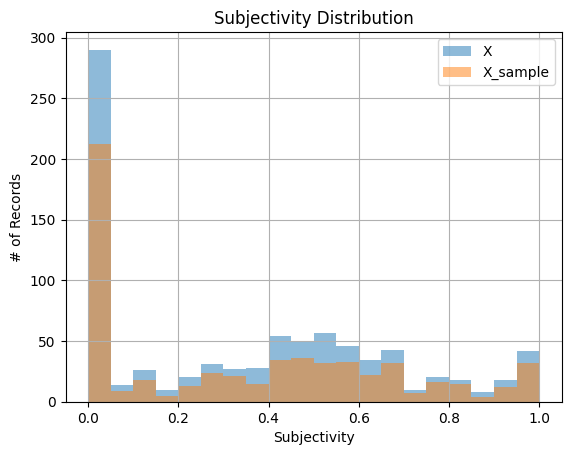

In [30]:
X.subjectivity.hist(bins=20, range=(-0.0, 1.0), alpha=0.5, density=False, label='X')
X_sample.subjectivity.hist(bins=20, range=(-0.0, 1.0), alpha=0.5, density=False, label='X_sample')
plt.legend()
plt.title('Subjectivity Distribution')
plt.xlabel('Subjectivity')
plt.ylabel('# of Records')

Text(0, 0.5, '# of Records')

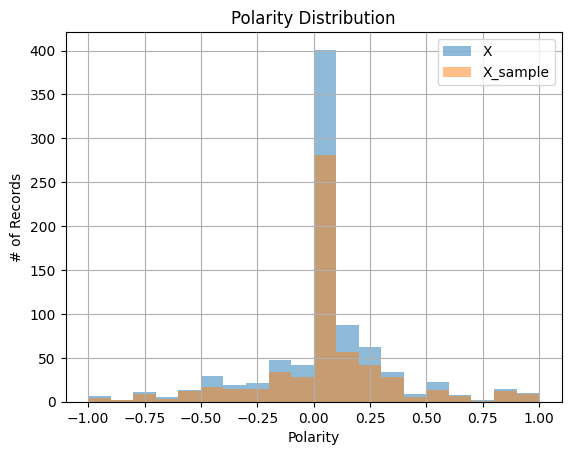

In [31]:
X.polarity.hist(bins=20, range=(-1.0, 1.0), alpha=0.5, density=False, label='X')
X_sample.polarity.hist(bins=20, range=(-1.0, 1.0), alpha=0.5, density=False, label='X_sample')
plt.legend()
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('# of Records')

Text(0, 0.5, '# of Records')

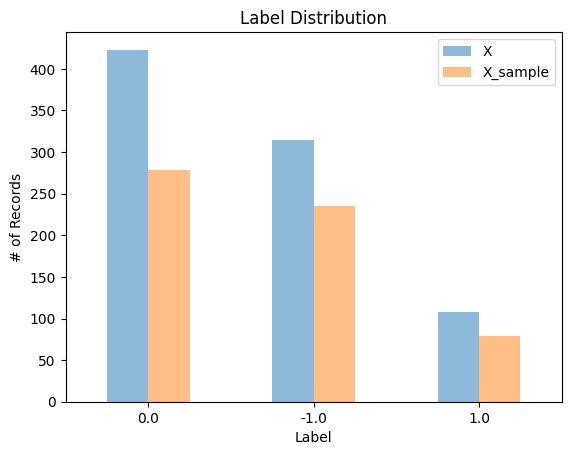

In [32]:
plot_df = pd.DataFrame({'X': X.label.value_counts(), 'X_sample': X_sample.label.value_counts()})
plot_df.plot(kind='bar', alpha=0.5, rot=0)
plt.legend()
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('# of Records')

### 5.2 Feature Creation

#### 5.2.1 Attribute Creation

#### 5.2.2 CountVectorizer

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

##### >>> **Exercise 9**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [34]:
analyze = count_vect.build_analyzer()
analyze(X.loc[56, 'text'])

['to',
 'be',
 'fair',
 'chinese',
 'exports',
 'to',
 'the',
 'us',
 'make',
 'up',
 'much',
 'larger',
 'portion',
 'of',
 'china',
 'gdp',
 'than',
 'the',
 'other',
 'way',
 'around',
 'china',
 'kinda',
 'does',
 'rely',
 'on',
 'the',
 'us',
 'consumer',
 'to',
 'degree']

In [35]:
from IPython.display import HTML
import random
import re

# Get the original text
original_text = X.text[56]

# Extract tokens from original_text
tokens = analyze(original_text)

# Create a dictionary to assign consistent random colors to tokens
color_map = {}
for token in set(tokens):
    color_map[token] = f"#{random.randint(0x444444, 0xFFFFFF):06x}"


# Highlight occurrences of tokens in the original text
highlighted_text = original_text
highlighted_text = highlighted_text.replace('\n', '<br/>')
for token, color in color_map.items():
    # Use word boundaries and case-insensitive matching
    pattern = r'\b' + re.escape(token) + r'\b'
    highlighted_text = re.sub(pattern,
                              f'<span style="border: 2px solid {color}aa; background-color: {color}22; font-size: 1.2em; margin: 0 2px; padding: 0 4px; border-radius: 4px;">{token}</span>', highlighted_text, flags=re.IGNORECASE)

# Display the highlighted text
display(HTML(f'<div style="line-height: 1.5;">{highlighted_text}</div>'))

##### >>> **Exercise 10**

~~We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.~~

We'll take a look at part of the vocabulary.

In [36]:
for i in np.random.randint(0, count_vect.vocabulary_.__len__(), size=10):
    print(i, count_vect.get_feature_names_out()[i])

3593 spilling
460 bang
2893 plays
1569 fiscal
4303 wrinkled
1075 day
3554 somehow
775 chasing
3482 shown
765 changing


##### >>> **Exercise 11**

From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

Here is an adjustable visualization script, and transposed to better see the distribution of terms across documents. Even though we can possibly use TF-IDF to rank important terms and show the highest ranked among them, for now, let's just randomly sample 100 terms from the vocabulary and visualize their distribution across documents.

(40, 500)


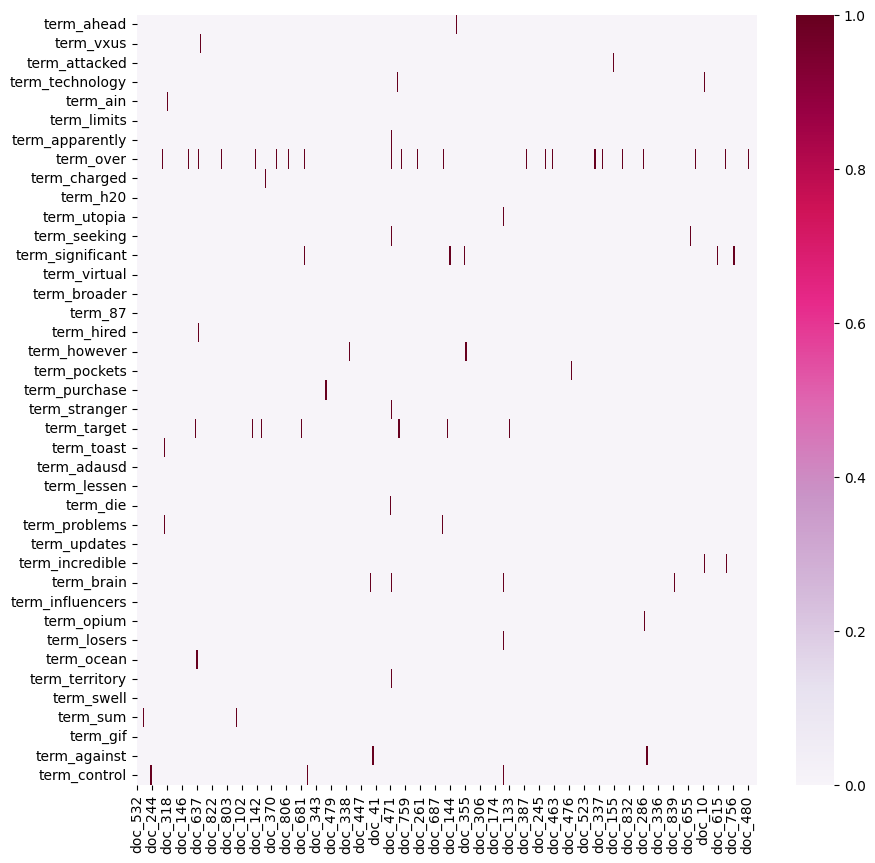

In [37]:
# Answer here
import seaborn as sns
SIZE = (40, 500)  # Adjust size (term, doc) as needed

# Randomly select indices for documents and terms
idx_y = np.random.choice(X_counts.shape[1], size=SIZE[0], replace=False)
idx_x = np.random.choice(X_counts.shape[0], size=SIZE[1], replace=False)
# Or simply take the first SIZE elements
# idx_y = np.arange(SIZE[0])
# idx_x = np.arange(SIZE[1])

plot_y = ["term_" + str(i) for i in count_vect.get_feature_names_out()[idx_y]]
plot_x = ["doc_" + str(i) for i in idx_x]

# X_counts[how many documents, how many terms]
# transpose to better see terms
plot_z = X_counts[idx_x][:, idx_y].toarray().T
print(plot_z.shape)  # Should be (SIZE[0], SIZE[1])

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=(SIZE[0] <= 40 and SIZE[1] <= 40))  # Annotate only for smaller sizes

### 5.3 Feature Selection

Based on the above exploration, we can remove some data columns:

- Irrelevant columns: `post_id`, `entities`
- Decomposed columns: `author`
- Remove `url` column, since it is difficult to parse for now

In [38]:
X.drop(columns=['post_id', 'entities', 'author', 'url'], inplace=True)

### 5.4 Attribute Transformation / Aggregation

#### 5.4.1 Numeric/Categorical Data

Previously we've added a column `is_bot` to mark bot users. Now, based on the above exploration, we can add some more useful attributes:

- From `datetime`, we can extract `year`, `month`, `day`, `hour`, `minute`, `second`, `day_of_week` (0 is Monday, 6 is Sunday), and `is_weekend` (boolean).
  - Impirically, posts/comments made during weekends may have different characteristics than those made during weekdays.
  - Among the mentioned attributes, we'll add `year`, `month`, `day`, `day_of_week`, and `is_weekend`.
- For the categorical columns `type` and `subreddit`, we will one-hot encode them.

In [39]:
# datetime
X['year'] = pd.to_datetime(X['datetime']).dt.year
X['month'] = pd.to_datetime(X['datetime']).dt.month
X['day'] = pd.to_datetime(X['datetime']).dt.day
X['day_of_week'] = pd.to_datetime(X['datetime']).dt.dayofweek
X['is_weekend'] = X['day_of_week'] >= 5  # Saturday and Sunday

In [40]:
# categorical
X = pd.get_dummies(X, columns=['type', 'subreddit'], prefix=['type', 'subr'])

Let's see the updated dataframe.

In [41]:
X.columns

Index(['datetime', 'title', 'upvotes', 'downvotes', 'upvote_ratio', 'text',
       'subjectivity', 'polarity', 'sentiment', 'label', 'is_bot', 'year',
       'month', 'day', 'day_of_week', 'is_weekend', 'type_comment',
       'type_post', 'subr_StockMarket', 'subr_stocks', 'subr_stockstobuytoday',
       'subr_wallstreetbets'],
      dtype='object')

In [42]:
X.head()

,datetime,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,label,...,month,day,day_of_week,is_weekend,type_comment,type_post,subr_StockMarket,subr_stocks,subr_stockstobuytoday,subr_wallstreetbets
0,2025-04-11 17:29:56,Retardation is on the menu boys! WSB is so back,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,-1.0,...,4,11,4,False,True,False,False,False,False,True
1,2025-04-12 1:12:19,Retail giant TARGET has now declined for 10 co...,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,0.0,...,4,12,5,True,True,False,False,False,False,True
2,2025-04-10 15:09:41,How do you feel about a sitting president maki...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,0.0,...,4,10,3,False,True,False,True,False,False,False
3,2023-08-30 17:12:55,Who knows more? $VMAR,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,1.0,...,8,30,2,False,False,True,False,False,True,False
4,2025-04-11 14:48:05,The Trump administration is begging Xi Jinping...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,-1.0,...,4,11,4,False,True,False,True,False,False,False


In [43]:
import plotly.graph_objects as go

# Prepare data for each attribute
attributes = ['year', 'month', 'day', 'day_of_week', 'is_weekend']
data = []
for attr in attributes:
    if attr == 'is_weekend':
        counts = X[attr].value_counts().sort_index()
        fig_data = go.Bar(x=counts.index.astype(int), y=counts.values, name=attr)
    else:
        counts = X[attr].value_counts().sort_index()
        fig_data = go.Bar(x=counts.index, y=counts.values, name=attr)
    data.append(fig_data)

# Create figure with initial data
fig = go.Figure(data=data)

# Add buttons for switching views
buttons = []
for i, attr in enumerate(attributes):
    buttons.append(dict(label=attr,
                        method="update",
                        args=[{"visible": [j == i for j in range(len(attributes))]},
                              {"title": f"Distribution of {attr}"}]))

fig.update_layout(updatemenus=[dict(active=0, buttons=buttons)],
                  title="Distribution of Attributes",
                  xaxis_title="Value",
                  yaxis_title="Count")


#### 5.4.2 Text Data

We have two text columns: `title` and `text`. We can perform count vectorization on both of them, and combine the resulting term-document matrices.

In [44]:
from tqdm import trange


cv_title = CountVectorizer()
cv_text = CountVectorizer()

X_title_counts = cv_title.fit_transform(X.title)
X_text_counts = cv_text.fit_transform(X.text)

tf_title = [X_title_counts[:, j].sum() for j in trange(X_title_counts.shape[1])]
tf_text = [X_text_counts[:, j].sum() for j in trange(X_text_counts.shape[1])]

tf_title = np.array(tf_title)
tf_text = np.array(tf_text)

100%|██████████| 4346/4346 [00:00<00:00, 24852.85it/s]


##### >>> **Exercise 12**

If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

##### >>> **Exercise 13** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

##### >>> **Exercise 14** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses).

##### >>> **Exercise 15** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [45]:
import plotly.express as px

top_n = 10000  # Adjust as needed for performance
use_log_scale = True  # Set to True to use log scale on y-axis

feature_names = sorted(
    cv_title.get_feature_names_out(),
    key=lambda x: tf_title[cv_title.vocabulary_[x]],
    reverse=True)[:top_n]
freqs = tf_title[cv_title.transform(feature_names).indices]
log_freqs = np.log1p(freqs)  # Log scale for better visualization

fig = px.bar(
    x=feature_names, y=log_freqs if use_log_scale else freqs,
    title='Top Term Frequencies',
    labels={'x': 'Terms', 'y': 'Log Frequency' if use_log_scale else 'Frequency'},
    custom_data=[freqs])
fig.update_layout(xaxis_tickangle=-90)
# Enable range slider for dragging and scrolling through terms
fig.update_xaxes(rangeslider_visible=True)
fig.update_traces(hovertemplate='Term: %{x}<br>Frequency: %{customdata[0]}')
fig.show()

In [46]:
import plotly.express as px

top_n = 10000  # Adjust as needed for performance
use_log_scale = True  # Set to True to use log scale on y-axis

feature_names = sorted(
    cv_text.get_feature_names_out(),
    key=lambda x: tf_text[cv_text.vocabulary_[x]],
    reverse=True)[:top_n]
freqs = tf_text[cv_text.transform(feature_names).indices]
log_freqs = np.log1p(freqs)  # Log scale for better visualization

fig = px.bar(
    x=feature_names, y=log_freqs if use_log_scale else freqs,
    title='Top Term Frequencies',
    labels={'x': 'Terms', 'y': 'Log Frequency' if use_log_scale else 'Frequency'},
    custom_data=[freqs])
fig.update_layout(xaxis_tickangle=-90)
# Enable range slider for dragging and scrolling through terms
fig.update_xaxes(rangeslider_visible=True)
fig.update_traces(hovertemplate='Term: %{x}<br>Frequency: %{customdata[0]}')
fig.show()

# Phase 2

In [47]:
### Begin Assignment Here

#### 5.4.2 Find Frequent Patterns